## KITCHEN PREP TIME DATASET ANALYSIS AND PREDICTION

In [163]:
# importing the necessary modules
# data manipulation modules: pandas and numpy
import pandas as pd
pd.set_option('display.max_columns', 50)
import numpy as np


# visualisation modules: matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# to hide warnings
import warnings; 
warnings.simplefilter('ignore')

# to display visualisations inline
%matplotlib inline

# to split the input into training and test sets
from sklearn.model_selection import train_test_split

# machine learning modules
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

#importing metrics to evaluate our model

from sklearn import metrics
from sklearn.metrics import r2_score

In [164]:
#Loading the dataset using pandas
df = pd.read_csv('test_data 2.csv', encoding = 'latin1')

In [165]:
#checking out the first 50 rows
df.head(50)

,id,pickup_user_id,total_amount,pickup_user_address_id,created_at.x,ki,cost_for_two,created_at.y,driver_assigned_at,reached_shop_at,shipped_at,reached_customer_at,complete_at,linked_at,item_name
0,22437988,10345796,961.70,15530971,NaN,NaN,NaN,01/08/17 11:20,01/08/17 11:26,01/08/17 11:30,01/08/17 11:31,01/08/17 12:11,01/08/17 12:12,01/08/17 11:26,NaN
1,22437990,10670850,330.00,15982357,NaN,NaN,NaN,01/08/17 11:21,01/08/17 11:22,01/08/17 11:44,01/08/17 11:45,01/08/17 11:55,01/08/17 11:56,01/08/17 11:22,NaN
2,22438023,10348502,299.60,15534234,NaN,NaN,NaN,01/08/17 11:30,01/08/17 11:30,01/08/17 11:48,01/08/17 11:50,01/08/17 12:00,01/08/17 12:00,01/08/17 11:30,NaN
3,22438033,10889894,1965.20,16276686,NaN,NaN,NaN,01/08/17 11:33,01/08/17 11:57,01/08/17 11:59,01/08/17 12:49,01/08/17 13:27,01/08/17 13:27,01/08/17 11:57,NaN
4,22438037,10006319,314.00,15054245,NaN,NaN,NaN,01/08/17 11:35,01/08/17 11:35,01/08/17 11:48,01/08/17 11:57,01/08/17 12:18,01/08/17 12:18,01/08/17 11:35,NaN
5,22438097,10970635,360.00,16391279,NaN,NaN,NaN,01/08/17 11:46,01/08/17 11:50,01/08/17 12:12,01/08/17 12:26,01/08/17 12:45,01/08/17 12:45,01/08/17 11:47,NaN
6,22438112,9678620,326.57,14612198,NaN,NaN,NaN,01/08/17 11:47,01/08/17 11:53,01/08/17 12:09,01/08/17 12:11,01/08/17 12:24,01/08/17 12:24,01/08/17 11:47,NaN
7,22438120,11063639,260.00,16514921,NaN,NaN,NaN,01/08/17 11:48,01/08/17 12:08,01/08/17 12:18,01/08/17 12:19,01/08/17 13:04,01/08/17 13:04,01/08/17 11:49,NaN
8,22438129,10352974,637.11,15539834,NaN,NaN,NaN,01/08/17 11:51,01/08/17 11:52,01/08/17 11:55,01/08/17 11:57,01/08/17 12:17,01/08/17 12:17,01/08/17 11:52,NaN
9,22438139,10889894,1239.50,16276686,NaN,NaN,NaN,01/08/17 11:55,01/08/17 12:07,01/08/17 12:09,01/08/17 12:25,01/08/17 12:45,01/08/17 13:26,01/08/17 12:04,NaN


In [166]:
#checking out the last 50 rows
df.tail(50)

,id,pickup_user_id,total_amount,pickup_user_address_id,created_at.x,ki,cost_for_two,created_at.y,driver_assigned_at,reached_shop_at,shipped_at,reached_customer_at,complete_at,linked_at,item_name
484142,23847416,11504233,397.66,17100232,01/11/17 17:23,cost_for_two,400.0,01/11/17 22:53,01/11/17 22:54,01/11/17 22:56,01/11/17 23:10,01/11/17 23:16,01/11/17 23:16,01/11/17 22:54,Choco Shake
484143,23847416,11504233,397.66,17100232,01/11/17 17:23,cost_for_two,400.0,01/11/17 22:53,01/11/17 22:54,01/11/17 22:56,01/11/17 23:10,01/11/17 23:16,01/11/17 23:16,01/11/17 22:54,Classic Fries
484144,23847416,11504233,397.66,17100232,01/11/17 17:23,cost_for_two,400.0,01/11/17 22:53,01/11/17 22:54,01/11/17 22:56,01/11/17 23:10,01/11/17 23:16,01/11/17 23:16,01/11/17 22:54,Grilled cheese sandwich
484145,23847418,11531552,100.00,17134880,01/11/17 17:24,cost_for_two,200.0,01/11/17 22:54,01/11/17 22:56,01/11/17 22:56,01/11/17 23:01,01/11/17 23:01,01/11/17 23:07,01/11/17 22:56,Chicken roll
484146,23847420,11443636,731.60,17020883,01/11/17 17:24,cost_for_two,1800.0,01/11/17 22:54,01/11/17 22:55,01/11/17 22:59,01/11/17 23:11,01/11/17 23:17,01/11/17 23:20,01/11/17 22:55,Drums of Heaven Shandong Style
484147,23847420,11443636,731.60,17020883,01/11/17 17:24,cost_for_two,1800.0,01/11/17 22:54,01/11/17 22:55,01/11/17 22:59,01/11/17 23:11,01/11/17 23:17,01/11/17 23:20,01/11/17 22:55,Chilli Chicken
484148,23847422,11760007,396.10,17419506,01/11/17 17:24,cost_for_two,550.0,01/11/17 22:54,01/11/17 22:55,01/11/17 23:12,01/11/17 23:21,01/11/17 23:35,01/11/17 23:35,01/11/17 22:55,The Meats Pizza
484149,23847423,11529556,330.40,17132390,01/11/17 17:24,cost_for_two,700.0,01/11/17 22:54,01/11/17 22:55,01/11/17 23:00,01/11/17 23:10,01/11/17 23:16,01/11/17 23:17,01/11/17 22:54,Egg Biryani [2 Eggs]
484150,23847423,11529556,330.40,17132390,01/11/17 17:24,cost_for_two,700.0,01/11/17 22:54,01/11/17 22:55,01/11/17 23:00,01/11/17 23:10,01/11/17 23:16,01/11/17 23:17,01/11/17 22:54,Veg biryani
484151,23847425,11728850,412.32,17380045,01/11/17 17:25,cost_for_two,650.0,01/11/17 22:55,01/11/17 22:56,01/11/17 22:57,01/11/17 23:12,01/11/17 23:22,01/11/17 23:22,01/11/17 22:55,Tandoori Paneer Tikka


In [167]:
#no of rows in the dataset
len(df)

484192

In [168]:
#getting row index and column labels
df.axes

[RangeIndex(start=0, stop=484192, step=1),
 Index(['id', 'pickup_user_id', 'total_amount', 'pickup_user_address_id',
        'created_at.x', 'ki', 'cost_for_two', 'created_at.y',
        'driver_assigned_at', 'reached_shop_at', 'shipped_at',
        'reached_customer_at', 'complete_at', 'linked_at', 'item_name'],
       dtype='object')]

In [169]:
#getting more info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484192 entries, 0 to 484191
Data columns (total 15 columns):
id                        484192 non-null int64
pickup_user_id            484192 non-null int64
total_amount              484192 non-null float64
pickup_user_address_id    484192 non-null int64
created_at.x              111715 non-null object
ki                        111715 non-null object
cost_for_two              111715 non-null float64
created_at.y              484192 non-null object
driver_assigned_at        483911 non-null object
reached_shop_at           484192 non-null object
shipped_at                483902 non-null object
reached_customer_at       482801 non-null object
complete_at               482179 non-null object
linked_at                 484192 non-null object
item_name                 471745 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 55.4+ MB


In [170]:
df[['created_at.x', 'ki', 'cost_for_two', 'item_name']].isnull()

,created_at.x,ki,cost_for_two,item_name
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
5,True,True,True,True
6,True,True,True,True
7,True,True,True,True
8,True,True,True,True
9,True,True,True,True


In [171]:
#removing few columns
df.drop(['created_at.x', 'ki', 'cost_for_two', 'item_name'], axis = 1, inplace = True)

In [172]:
df.head(100)

,id,pickup_user_id,total_amount,pickup_user_address_id,created_at.y,driver_assigned_at,reached_shop_at,shipped_at,reached_customer_at,complete_at,linked_at
0,22437988,10345796,961.70,15530971,01/08/17 11:20,01/08/17 11:26,01/08/17 11:30,01/08/17 11:31,01/08/17 12:11,01/08/17 12:12,01/08/17 11:26
1,22437990,10670850,330.00,15982357,01/08/17 11:21,01/08/17 11:22,01/08/17 11:44,01/08/17 11:45,01/08/17 11:55,01/08/17 11:56,01/08/17 11:22
2,22438023,10348502,299.60,15534234,01/08/17 11:30,01/08/17 11:30,01/08/17 11:48,01/08/17 11:50,01/08/17 12:00,01/08/17 12:00,01/08/17 11:30
3,22438033,10889894,1965.20,16276686,01/08/17 11:33,01/08/17 11:57,01/08/17 11:59,01/08/17 12:49,01/08/17 13:27,01/08/17 13:27,01/08/17 11:57
4,22438037,10006319,314.00,15054245,01/08/17 11:35,01/08/17 11:35,01/08/17 11:48,01/08/17 11:57,01/08/17 12:18,01/08/17 12:18,01/08/17 11:35
5,22438097,10970635,360.00,16391279,01/08/17 11:46,01/08/17 11:50,01/08/17 12:12,01/08/17 12:26,01/08/17 12:45,01/08/17 12:45,01/08/17 11:47
6,22438112,9678620,326.57,14612198,01/08/17 11:47,01/08/17 11:53,01/08/17 12:09,01/08/17 12:11,01/08/17 12:24,01/08/17 12:24,01/08/17 11:47
7,22438120,11063639,260.00,16514921,01/08/17 11:48,01/08/17 12:08,01/08/17 12:18,01/08/17 12:19,01/08/17 13:04,01/08/17 13:04,01/08/17 11:49
8,22438129,10352974,637.11,15539834,01/08/17 11:51,01/08/17 11:52,01/08/17 11:55,01/08/17 11:57,01/08/17 12:17,01/08/17 12:17,01/08/17 11:52
9,22438139,10889894,1239.50,16276686,01/08/17 11:55,01/08/17 12:07,01/08/17 12:09,01/08/17 12:25,01/08/17 12:45,01/08/17 13:26,01/08/17 12:04


In [173]:
#converting all date columns from strings to datetime objects 
# dayfirst = True is to indicate that the data is in '%D%M%Y' format
df['created_at.y'] = pd.to_datetime(df['created_at.y'], dayfirst=True) 
df['driver_assigned_at'] = pd.to_datetime(df['driver_assigned_at'], dayfirst=True)
df['reached_shop_at'] = pd.to_datetime(df['reached_shop_at'], dayfirst=True)
df['shipped_at'] = pd.to_datetime(df['shipped_at'], dayfirst=True)
df['reached_customer_at'] = pd.to_datetime(df['reached_customer_at'], dayfirst=True)
df['complete_at'] = pd.to_datetime(df['complete_at'], dayfirst=True)
df['linked_at'] = pd.to_datetime(df['linked_at'], dayfirst=True)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484192 entries, 0 to 484191
Data columns (total 11 columns):
id                        484192 non-null int64
pickup_user_id            484192 non-null int64
total_amount              484192 non-null float64
pickup_user_address_id    484192 non-null int64
created_at.y              484192 non-null datetime64[ns]
driver_assigned_at        483911 non-null datetime64[ns]
reached_shop_at           484192 non-null datetime64[ns]
shipped_at                483902 non-null datetime64[ns]
reached_customer_at       482801 non-null datetime64[ns]
complete_at               482179 non-null datetime64[ns]
linked_at                 484192 non-null datetime64[ns]
dtypes: datetime64[ns](7), float64(1), int64(3)
memory usage: 40.6 MB


In [175]:
df [ df['driver_assigned_at'].isnull() ]

,id,pickup_user_id,total_amount,pickup_user_address_id,created_at.y,driver_assigned_at,reached_shop_at,shipped_at,reached_customer_at,complete_at,linked_at
4900,22752755,11124630,470.00,16598351,2017-08-18 19:43:00,NaT,2017-08-18 20:20:00,2017-08-18 20:22:00,2017-08-18 21:16:00,2017-08-18 21:16:00,2017-08-18 19:47:00
7251,22863068,11124359,535.60,16598055,2017-08-24 20:39:00,NaT,2017-08-24 20:47:00,2017-08-24 20:47:00,2017-08-24 21:01:00,2017-08-24 21:01:00,2017-08-24 20:40:00
9299,22957411,11128726,434.30,16603571,2017-08-27 20:39:00,NaT,2017-08-27 20:43:00,2017-08-27 21:32:00,2017-08-27 21:45:00,2017-08-27 21:45:00,2017-08-27 20:39:00
10999,22997238,11261263,377.50,16781445,2017-08-30 19:09:00,NaT,2017-08-30 19:19:00,2017-08-30 19:19:00,2017-08-30 19:24:00,2017-08-30 19:24:00,2017-08-30 19:09:00
11112,22998459,11322897,182.90,16863114,2017-08-30 20:07:00,NaT,2017-08-30 20:18:00,2017-08-30 21:07:00,2017-08-30 21:41:00,2017-08-30 21:41:00,2017-08-30 20:07:00
12603,23024895,11256320,516.38,16774809,2017-09-01 17:23:00,NaT,2017-09-01 17:41:00,2017-09-01 17:42:00,2017-09-01 18:17:00,2017-09-01 18:17:00,2017-09-01 17:24:00
12604,23024895,11256320,516.38,16774809,2017-09-01 17:23:00,NaT,2017-09-01 17:41:00,2017-09-01 17:42:00,2017-09-01 18:17:00,2017-09-01 18:17:00,2017-09-01 17:24:00
19066,23107670,11277340,298.50,16802360,2017-09-04 22:10:00,NaT,2017-09-04 22:26:00,2017-09-04 22:45:00,2017-09-04 22:57:00,2017-09-04 22:57:00,2017-09-04 22:12:00
19067,23107670,11277340,298.50,16802360,2017-09-04 22:10:00,NaT,2017-09-04 22:26:00,2017-09-04 22:45:00,2017-09-04 22:57:00,2017-09-04 22:57:00,2017-09-04 22:12:00
19081,23107729,11277340,775.50,16802360,2017-09-04 22:17:00,NaT,2017-09-04 22:26:00,2017-09-04 22:45:00,2017-09-04 22:57:00,2017-09-04 22:57:00,2017-09-04 22:19:00


In [176]:
# filling the Null values in driver_assigned_at column with the corresponding values in linked_at column
df['driver_assigned_at'].fillna(df['linked_at'], inplace = True)

In [177]:
df[df['driver_assigned_at'].isnull()]

,id,pickup_user_id,total_amount,pickup_user_address_id,created_at.y,driver_assigned_at,reached_shop_at,shipped_at,reached_customer_at,complete_at,linked_at


In [178]:
#dropping rows that have Null values in any one of the following columns
df.dropna(subset = ['shipped_at', 'reached_customer_at', 'complete_at'], inplace = True)

In [179]:
df[df['reached_shop_at'].isnull()]

,id,pickup_user_id,total_amount,pickup_user_address_id,created_at.y,driver_assigned_at,reached_shop_at,shipped_at,reached_customer_at,complete_at,linked_at


In [180]:
df.info() #info shows that we don't have any more Null values in our dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482179 entries, 0 to 484191
Data columns (total 11 columns):
id                        482179 non-null int64
pickup_user_id            482179 non-null int64
total_amount              482179 non-null float64
pickup_user_address_id    482179 non-null int64
created_at.y              482179 non-null datetime64[ns]
driver_assigned_at        482179 non-null datetime64[ns]
reached_shop_at           482179 non-null datetime64[ns]
shipped_at                482179 non-null datetime64[ns]
reached_customer_at       482179 non-null datetime64[ns]
complete_at               482179 non-null datetime64[ns]
linked_at                 482179 non-null datetime64[ns]
dtypes: datetime64[ns](7), float64(1), int64(3)
memory usage: 44.1 MB


### Feature Engineering
#### Calculating the following features

1. Number of items for every order
2. Kitchen Prep Time (KPT)
3. Driver wait time at shop (restaurant)
4. First Mile Time (Time taken for the delivery boy to reach the restaurant)
5. Hour of the day
6. Time of the day/ Time of day no --> Categorical Variable: Morning, Afternoon, Evening and Night
7. Day of the week/ day of week no
8. Weekend or not -> A two valued column (1 for Yes, it is a weekend   0 for No, it is not a weekend)
9. Week of the year (Independent variable for plotting weekly KPT along y axis)

In [181]:
df.head(50)

,id,pickup_user_id,total_amount,pickup_user_address_id,created_at.y,driver_assigned_at,reached_shop_at,shipped_at,reached_customer_at,complete_at,linked_at
0,22437988,10345796,961.70,15530971,2017-08-01 11:20:00,2017-08-01 11:26:00,2017-08-01 11:30:00,2017-08-01 11:31:00,2017-08-01 12:11:00,2017-08-01 12:12:00,2017-08-01 11:26:00
1,22437990,10670850,330.00,15982357,2017-08-01 11:21:00,2017-08-01 11:22:00,2017-08-01 11:44:00,2017-08-01 11:45:00,2017-08-01 11:55:00,2017-08-01 11:56:00,2017-08-01 11:22:00
2,22438023,10348502,299.60,15534234,2017-08-01 11:30:00,2017-08-01 11:30:00,2017-08-01 11:48:00,2017-08-01 11:50:00,2017-08-01 12:00:00,2017-08-01 12:00:00,2017-08-01 11:30:00
3,22438033,10889894,1965.20,16276686,2017-08-01 11:33:00,2017-08-01 11:57:00,2017-08-01 11:59:00,2017-08-01 12:49:00,2017-08-01 13:27:00,2017-08-01 13:27:00,2017-08-01 11:57:00
4,22438037,10006319,314.00,15054245,2017-08-01 11:35:00,2017-08-01 11:35:00,2017-08-01 11:48:00,2017-08-01 11:57:00,2017-08-01 12:18:00,2017-08-01 12:18:00,2017-08-01 11:35:00
5,22438097,10970635,360.00,16391279,2017-08-01 11:46:00,2017-08-01 11:50:00,2017-08-01 12:12:00,2017-08-01 12:26:00,2017-08-01 12:45:00,2017-08-01 12:45:00,2017-08-01 11:47:00
6,22438112,9678620,326.57,14612198,2017-08-01 11:47:00,2017-08-01 11:53:00,2017-08-01 12:09:00,2017-08-01 12:11:00,2017-08-01 12:24:00,2017-08-01 12:24:00,2017-08-01 11:47:00
7,22438120,11063639,260.00,16514921,2017-08-01 11:48:00,2017-08-01 12:08:00,2017-08-01 12:18:00,2017-08-01 12:19:00,2017-08-01 13:04:00,2017-08-01 13:04:00,2017-08-01 11:49:00
8,22438129,10352974,637.11,15539834,2017-08-01 11:51:00,2017-08-01 11:52:00,2017-08-01 11:55:00,2017-08-01 11:57:00,2017-08-01 12:17:00,2017-08-01 12:17:00,2017-08-01 11:52:00
9,22438139,10889894,1239.50,16276686,2017-08-01 11:55:00,2017-08-01 12:07:00,2017-08-01 12:09:00,2017-08-01 12:25:00,2017-08-01 12:45:00,2017-08-01 13:26:00,2017-08-01 12:04:00


In [182]:
order_groups = df.groupby(by = 'id')
no_of_items_df = pd.Series(order_groups.size()).to_frame().reset_index()
no_of_items_df.columns = ['id', 'no_of_items']

In [183]:
#Dataframe containing no of items in every order
no_of_items_df

,id,no_of_items
0,22437988,1
1,22437990,1
2,22438023,1
3,22438033,1
4,22438037,1
5,22438097,1
6,22438112,1
7,22438120,1
8,22438129,1
9,22438139,1


In [184]:
#changing the level of granularity of the dataset from item level to order level
df = df [ ~df['id'].duplicated()]

In [185]:
len(df)

194518

In [186]:
#performing inner join of df with no_of_items_df to bring no of items for corresponding orders into the dataset
df = df.merge(no_of_items_df, how = "inner", on = "id")

In [187]:
df.head(50)

,id,pickup_user_id,total_amount,pickup_user_address_id,created_at.y,driver_assigned_at,reached_shop_at,shipped_at,reached_customer_at,complete_at,linked_at,no_of_items
0,22437988,10345796,961.70,15530971,2017-08-01 11:20:00,2017-08-01 11:26:00,2017-08-01 11:30:00,2017-08-01 11:31:00,2017-08-01 12:11:00,2017-08-01 12:12:00,2017-08-01 11:26:00,1
1,22437990,10670850,330.00,15982357,2017-08-01 11:21:00,2017-08-01 11:22:00,2017-08-01 11:44:00,2017-08-01 11:45:00,2017-08-01 11:55:00,2017-08-01 11:56:00,2017-08-01 11:22:00,1
2,22438023,10348502,299.60,15534234,2017-08-01 11:30:00,2017-08-01 11:30:00,2017-08-01 11:48:00,2017-08-01 11:50:00,2017-08-01 12:00:00,2017-08-01 12:00:00,2017-08-01 11:30:00,1
3,22438033,10889894,1965.20,16276686,2017-08-01 11:33:00,2017-08-01 11:57:00,2017-08-01 11:59:00,2017-08-01 12:49:00,2017-08-01 13:27:00,2017-08-01 13:27:00,2017-08-01 11:57:00,1
4,22438037,10006319,314.00,15054245,2017-08-01 11:35:00,2017-08-01 11:35:00,2017-08-01 11:48:00,2017-08-01 11:57:00,2017-08-01 12:18:00,2017-08-01 12:18:00,2017-08-01 11:35:00,1
5,22438097,10970635,360.00,16391279,2017-08-01 11:46:00,2017-08-01 11:50:00,2017-08-01 12:12:00,2017-08-01 12:26:00,2017-08-01 12:45:00,2017-08-01 12:45:00,2017-08-01 11:47:00,1
6,22438112,9678620,326.57,14612198,2017-08-01 11:47:00,2017-08-01 11:53:00,2017-08-01 12:09:00,2017-08-01 12:11:00,2017-08-01 12:24:00,2017-08-01 12:24:00,2017-08-01 11:47:00,1
7,22438120,11063639,260.00,16514921,2017-08-01 11:48:00,2017-08-01 12:08:00,2017-08-01 12:18:00,2017-08-01 12:19:00,2017-08-01 13:04:00,2017-08-01 13:04:00,2017-08-01 11:49:00,1
8,22438129,10352974,637.11,15539834,2017-08-01 11:51:00,2017-08-01 11:52:00,2017-08-01 11:55:00,2017-08-01 11:57:00,2017-08-01 12:17:00,2017-08-01 12:17:00,2017-08-01 11:52:00,1
9,22438139,10889894,1239.50,16276686,2017-08-01 11:55:00,2017-08-01 12:07:00,2017-08-01 12:09:00,2017-08-01 12:25:00,2017-08-01 12:45:00,2017-08-01 13:26:00,2017-08-01 12:04:00,1


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194518 entries, 0 to 194517
Data columns (total 12 columns):
id                        194518 non-null int64
pickup_user_id            194518 non-null int64
total_amount              194518 non-null float64
pickup_user_address_id    194518 non-null int64
created_at.y              194518 non-null datetime64[ns]
driver_assigned_at        194518 non-null datetime64[ns]
reached_shop_at           194518 non-null datetime64[ns]
shipped_at                194518 non-null datetime64[ns]
reached_customer_at       194518 non-null datetime64[ns]
complete_at               194518 non-null datetime64[ns]
linked_at                 194518 non-null datetime64[ns]
no_of_items               194518 non-null int64
dtypes: datetime64[ns](7), float64(1), int64(4)
memory usage: 19.3 MB


In [189]:
#kitchen prep time calculation
df['kitchen_prep_time'] = df['shipped_at'] - df['linked_at']

#driver wait time at shop calculation
df['driver_wait_time_at_shop'] = df['shipped_at'] - df['reached_shop_at']

#first mile time calculation
df['first_mile_time'] = df['reached_shop_at'] - df['driver_assigned_at']

#hour of day calculation
df['hour_of_day'] = df['linked_at'].dt.hour

In [190]:
#Calculating time of day
def time_of_day(number):
    if number < 12:
        return 'Morning'
    elif number >= 12 and number < 16:
        return 'Afternoon'
    elif number >=16 and number <19:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['hour_of_day'].apply(time_of_day)

In [191]:
#Time of day number
def time_of_day_no(number):
    if number < 12:
        return 30
    elif number >= 12 and number < 16:
        return 31
    elif number >=16 and number <19:
        return 32
    else:
        return 33

df['time_of_day_no'] = df['hour_of_day'].apply(time_of_day_no)

In [192]:
# Calculating weekday name and weekday number
df['weekday_name'] = df['linked_at'].dt.weekday_name
df['weekday_no'] = df['linked_at'].dt.weekday

In [193]:
# Creating a two valued column to store information of whether the day is a weekday or weekend
def Is_it_a_weekend(weekday_no):
    if weekday_no == 5 or weekday_no == 6:
        return 1 # 1 means weekend
    else:
        return 0 # 0 means weekday

df['weekend_or_not'] = df['weekday_no'].apply(Is_it_a_weekend)

In [194]:
df['week_of_year'] = df['linked_at'].dt.week

In [195]:
df.head(100)

,id,pickup_user_id,total_amount,pickup_user_address_id,created_at.y,driver_assigned_at,reached_shop_at,shipped_at,reached_customer_at,complete_at,linked_at,no_of_items,kitchen_prep_time,driver_wait_time_at_shop,first_mile_time,hour_of_day,time_of_day,time_of_day_no,weekday_name,weekday_no,weekend_or_not,week_of_year
0,22437988,10345796,961.70,15530971,2017-08-01 11:20:00,2017-08-01 11:26:00,2017-08-01 11:30:00,2017-08-01 11:31:00,2017-08-01 12:11:00,2017-08-01 12:12:00,2017-08-01 11:26:00,1,00:05:00,00:01:00,00:04:00,11,Morning,30,Tuesday,1,0,31
1,22437990,10670850,330.00,15982357,2017-08-01 11:21:00,2017-08-01 11:22:00,2017-08-01 11:44:00,2017-08-01 11:45:00,2017-08-01 11:55:00,2017-08-01 11:56:00,2017-08-01 11:22:00,1,00:23:00,00:01:00,00:22:00,11,Morning,30,Tuesday,1,0,31
2,22438023,10348502,299.60,15534234,2017-08-01 11:30:00,2017-08-01 11:30:00,2017-08-01 11:48:00,2017-08-01 11:50:00,2017-08-01 12:00:00,2017-08-01 12:00:00,2017-08-01 11:30:00,1,00:20:00,00:02:00,00:18:00,11,Morning,30,Tuesday,1,0,31
3,22438033,10889894,1965.20,16276686,2017-08-01 11:33:00,2017-08-01 11:57:00,2017-08-01 11:59:00,2017-08-01 12:49:00,2017-08-01 13:27:00,2017-08-01 13:27:00,2017-08-01 11:57:00,1,00:52:00,00:50:00,00:02:00,11,Morning,30,Tuesday,1,0,31
4,22438037,10006319,314.00,15054245,2017-08-01 11:35:00,2017-08-01 11:35:00,2017-08-01 11:48:00,2017-08-01 11:57:00,2017-08-01 12:18:00,2017-08-01 12:18:00,2017-08-01 11:35:00,1,00:22:00,00:09:00,00:13:00,11,Morning,30,Tuesday,1,0,31
5,22438097,10970635,360.00,16391279,2017-08-01 11:46:00,2017-08-01 11:50:00,2017-08-01 12:12:00,2017-08-01 12:26:00,2017-08-01 12:45:00,2017-08-01 12:45:00,2017-08-01 11:47:00,1,00:39:00,00:14:00,00:22:00,11,Morning,30,Tuesday,1,0,31
6,22438112,9678620,326.57,14612198,2017-08-01 11:47:00,2017-08-01 11:53:00,2017-08-01 12:09:00,2017-08-01 12:11:00,2017-08-01 12:24:00,2017-08-01 12:24:00,2017-08-01 11:47:00,1,00:24:00,00:02:00,00:16:00,11,Morning,30,Tuesday,1,0,31
7,22438120,11063639,260.00,16514921,2017-08-01 11:48:00,2017-08-01 12:08:00,2017-08-01 12:18:00,2017-08-01 12:19:00,2017-08-01 13:04:00,2017-08-01 13:04:00,2017-08-01 11:49:00,1,00:30:00,00:01:00,00:10:00,11,Morning,30,Tuesday,1,0,31
8,22438129,10352974,637.11,15539834,2017-08-01 11:51:00,2017-08-01 11:52:00,2017-08-01 11:55:00,2017-08-01 11:57:00,2017-08-01 12:17:00,2017-08-01 12:17:00,2017-08-01 11:52:00,1,00:05:00,00:02:00,00:03:00,11,Morning,30,Tuesday,1,0,31
9,22438139,10889894,1239.50,16276686,2017-08-01 11:55:00,2017-08-01 12:07:00,2017-08-01 12:09:00,2017-08-01 12:25:00,2017-08-01 12:45:00,2017-08-01 13:26:00,2017-08-01 12:04:00,1,00:21:00,00:16:00,00:02:00,12,Afternoon,31,Tuesday,1,0,31


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194518 entries, 0 to 194517
Data columns (total 22 columns):
id                          194518 non-null int64
pickup_user_id              194518 non-null int64
total_amount                194518 non-null float64
pickup_user_address_id      194518 non-null int64
created_at.y                194518 non-null datetime64[ns]
driver_assigned_at          194518 non-null datetime64[ns]
reached_shop_at             194518 non-null datetime64[ns]
shipped_at                  194518 non-null datetime64[ns]
reached_customer_at         194518 non-null datetime64[ns]
complete_at                 194518 non-null datetime64[ns]
linked_at                   194518 non-null datetime64[ns]
no_of_items                 194518 non-null int64
kitchen_prep_time           194518 non-null timedelta64[ns]
driver_wait_time_at_shop    194518 non-null timedelta64[ns]
first_mile_time             194518 non-null timedelta64[ns]
hour_of_day                 194518 non-null 

In [197]:
#Type casting string to category for the following columns as they take only a few categorical values. 
#This also reduces memory occupied
df['time_of_day'] = df['time_of_day'].astype('category')
df['weekday_name'] = df['weekday_name'].astype('category')

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194518 entries, 0 to 194517
Data columns (total 22 columns):
id                          194518 non-null int64
pickup_user_id              194518 non-null int64
total_amount                194518 non-null float64
pickup_user_address_id      194518 non-null int64
created_at.y                194518 non-null datetime64[ns]
driver_assigned_at          194518 non-null datetime64[ns]
reached_shop_at             194518 non-null datetime64[ns]
shipped_at                  194518 non-null datetime64[ns]
reached_customer_at         194518 non-null datetime64[ns]
complete_at                 194518 non-null datetime64[ns]
linked_at                   194518 non-null datetime64[ns]
no_of_items                 194518 non-null int64
kitchen_prep_time           194518 non-null timedelta64[ns]
driver_wait_time_at_shop    194518 non-null timedelta64[ns]
first_mile_time             194518 non-null timedelta64[ns]
hour_of_day                 194518 non-null 

In [199]:
#Converting timedelta objects into int (calculating minutes)
df['kitchen_prep_time'] = df['kitchen_prep_time'].dt.seconds / 60
df['driver_wait_time_at_shop'] = df['driver_wait_time_at_shop'].dt.seconds / 60
df['first_mile_time'] = df['first_mile_time'].dt.seconds / 60

In [200]:
# removing extreme outliers (impractical scenarios) by dropping rows where the KPT is greater than 2.5 hrs
df = df [ df['kitchen_prep_time'] <= 150 ]

In [201]:
df.head(50)

,id,pickup_user_id,total_amount,pickup_user_address_id,created_at.y,driver_assigned_at,reached_shop_at,shipped_at,reached_customer_at,complete_at,linked_at,no_of_items,kitchen_prep_time,driver_wait_time_at_shop,first_mile_time,hour_of_day,time_of_day,time_of_day_no,weekday_name,weekday_no,weekend_or_not,week_of_year
0,22437988,10345796,961.70,15530971,2017-08-01 11:20:00,2017-08-01 11:26:00,2017-08-01 11:30:00,2017-08-01 11:31:00,2017-08-01 12:11:00,2017-08-01 12:12:00,2017-08-01 11:26:00,1,5.0,1.0,4.0,11,Morning,30,Tuesday,1,0,31
1,22437990,10670850,330.00,15982357,2017-08-01 11:21:00,2017-08-01 11:22:00,2017-08-01 11:44:00,2017-08-01 11:45:00,2017-08-01 11:55:00,2017-08-01 11:56:00,2017-08-01 11:22:00,1,23.0,1.0,22.0,11,Morning,30,Tuesday,1,0,31
2,22438023,10348502,299.60,15534234,2017-08-01 11:30:00,2017-08-01 11:30:00,2017-08-01 11:48:00,2017-08-01 11:50:00,2017-08-01 12:00:00,2017-08-01 12:00:00,2017-08-01 11:30:00,1,20.0,2.0,18.0,11,Morning,30,Tuesday,1,0,31
3,22438033,10889894,1965.20,16276686,2017-08-01 11:33:00,2017-08-01 11:57:00,2017-08-01 11:59:00,2017-08-01 12:49:00,2017-08-01 13:27:00,2017-08-01 13:27:00,2017-08-01 11:57:00,1,52.0,50.0,2.0,11,Morning,30,Tuesday,1,0,31
4,22438037,10006319,314.00,15054245,2017-08-01 11:35:00,2017-08-01 11:35:00,2017-08-01 11:48:00,2017-08-01 11:57:00,2017-08-01 12:18:00,2017-08-01 12:18:00,2017-08-01 11:35:00,1,22.0,9.0,13.0,11,Morning,30,Tuesday,1,0,31
5,22438097,10970635,360.00,16391279,2017-08-01 11:46:00,2017-08-01 11:50:00,2017-08-01 12:12:00,2017-08-01 12:26:00,2017-08-01 12:45:00,2017-08-01 12:45:00,2017-08-01 11:47:00,1,39.0,14.0,22.0,11,Morning,30,Tuesday,1,0,31
6,22438112,9678620,326.57,14612198,2017-08-01 11:47:00,2017-08-01 11:53:00,2017-08-01 12:09:00,2017-08-01 12:11:00,2017-08-01 12:24:00,2017-08-01 12:24:00,2017-08-01 11:47:00,1,24.0,2.0,16.0,11,Morning,30,Tuesday,1,0,31
7,22438120,11063639,260.00,16514921,2017-08-01 11:48:00,2017-08-01 12:08:00,2017-08-01 12:18:00,2017-08-01 12:19:00,2017-08-01 13:04:00,2017-08-01 13:04:00,2017-08-01 11:49:00,1,30.0,1.0,10.0,11,Morning,30,Tuesday,1,0,31
8,22438129,10352974,637.11,15539834,2017-08-01 11:51:00,2017-08-01 11:52:00,2017-08-01 11:55:00,2017-08-01 11:57:00,2017-08-01 12:17:00,2017-08-01 12:17:00,2017-08-01 11:52:00,1,5.0,2.0,3.0,11,Morning,30,Tuesday,1,0,31
9,22438139,10889894,1239.50,16276686,2017-08-01 11:55:00,2017-08-01 12:07:00,2017-08-01 12:09:00,2017-08-01 12:25:00,2017-08-01 12:45:00,2017-08-01 13:26:00,2017-08-01 12:04:00,1,21.0,16.0,2.0,12,Afternoon,31,Tuesday,1,0,31


In [202]:
len(df) #dataset rows reduced from 484192 to 194457

194457

### Analysing the factors affecting KPT through visualisations
1. Histogram with KDE plot of the Kitchen Prep Time 
2. Bar Plot to understand average KPT as a function of the Time of the Day (with hue set to Weekend or not parameter)
3. Box Plot with the days of the week on the x axis and KPT as the dependent variable
4. Heatmap to study the increase/ decrease of average KPT as the day progresses
5. Lineplot to examine average KPT as the weeks progress and year end nears
6. Bar plot with average KPT as a function of the no of items in an order
7. Scatter Plot for variation of KPT with the cost of the order
8. Regression Plot to study the relationship between driver wait time at shop and KPT

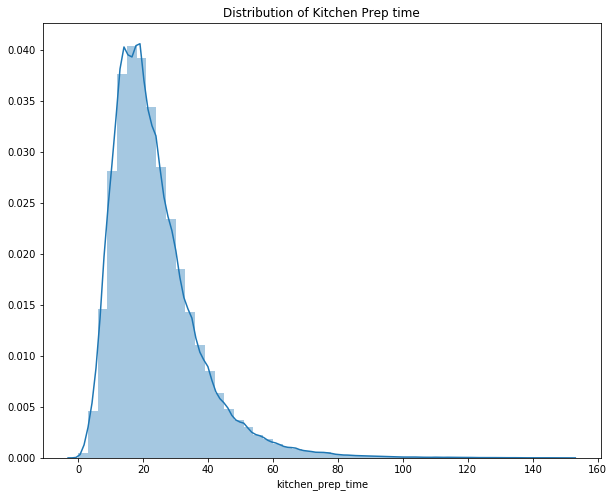

In [203]:
#Histogram with KDE plot for Kitchen Prep Time
plt.figure(figsize=(10, 8))
plt.title('Distribution of Kitchen Prep time')
sns.distplot(df['kitchen_prep_time'], bins = 50)
plt.show()

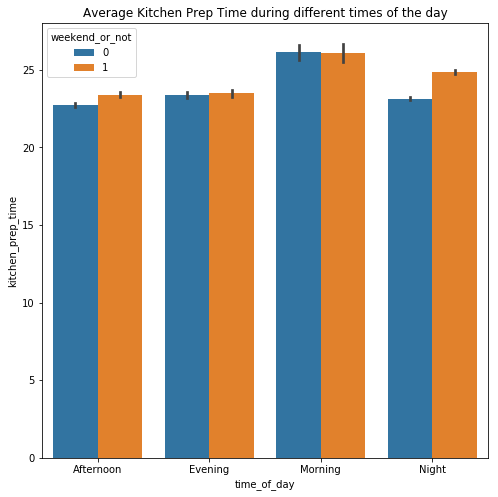

In [204]:
plt.figure(figsize=(8, 8))
plt.title('Average Kitchen Prep Time during different times of the day')
sns.barplot(x = 'time_of_day', y = 'kitchen_prep_time', data = df, hue = 'weekend_or_not')
plt.show()

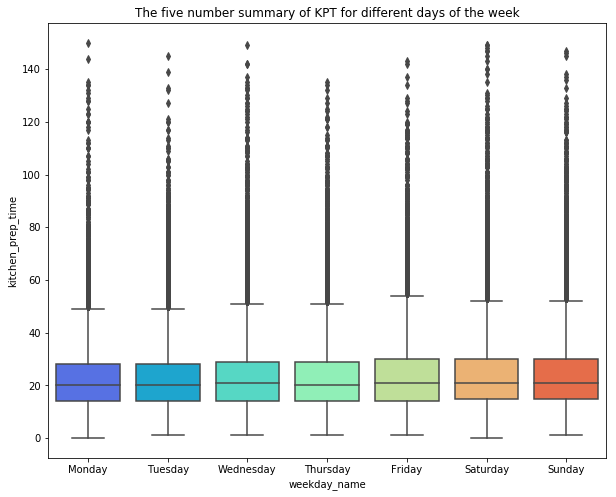

In [205]:
plt.figure(figsize=(10, 8))
plt.title('The five number summary of KPT for different days of the week')
sns.boxplot(x="weekday_name", y="kitchen_prep_time", data=df,palette='rainbow', 
            order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

In [206]:
hour_of_day_grouping = df.groupby(by = ['hour_of_day', 'weekend_or_not']).agg({'kitchen_prep_time': 'mean'}).sort_index()

In [207]:
hour_of_day_grouping

kitchen_prep_time
hour_of_day weekend_or_not                   
0           0                       21.000000
8           1                       25.000000
9           0                       37.000000
            1                       24.750000
10          0                       29.857143
            1                       18.300000
11          0                       26.123073
            1                       26.118679
12          0                       24.028124
            1                       24.731063
13          0                       23.018989
            1                       23.912174
14          0                       21.659318
            1                       22.472858
15          0                       21.785358
            1                       21.830930
16          0                       23.039395
            1                       22.633354
17          0                       23.060645
            1                       22.991288
18          0                       23.781262
            1                       24.391499
19          0                       23.766693
            1                       25.658107
20          0                       23.837132
            1                       25.874878
21          0                       22.745263
            1                       23.928607
22          0                       20.779113
            1                       21.786148
23          0                       17.202020
            1                       17.794872

In [208]:
hour_of_day_grouping.reset_index()
hour_of_day_pivot_table = hour_of_day_grouping.pivot_table(index = 'hour_of_day', columns='weekend_or_not', values='kitchen_prep_time')


In [209]:
hour_of_day_pivot_table

weekend_or_not,0,1
hour_of_day,,
0,21.000000,NaN
8,NaN,25.000000
9,37.000000,24.750000
10,29.857143,18.300000
11,26.123073,26.118679
12,24.028124,24.731063
13,23.018989,23.912174
14,21.659318,22.472858
15,21.785358,21.830930


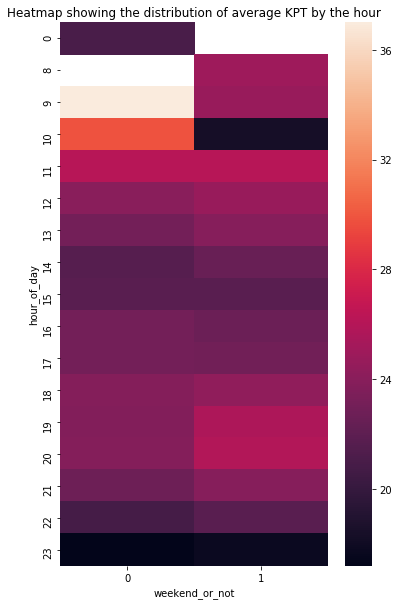

In [210]:
plt.figure(figsize=(6, 10))
plt.title('Heatmap showing the distribution of average KPT by the hour')
sns.heatmap(hour_of_day_pivot_table)
plt.show()

In [211]:
week_grouping = df.groupby(by = 'week_of_year').agg({'kitchen_prep_time': 'mean'})
week_grouping

,kitchen_prep_time
week_of_year,
31,19.814409
32,21.260219
33,22.639027
34,22.808608
35,24.322420
36,24.003171
37,23.650442
38,23.870870
39,24.601999


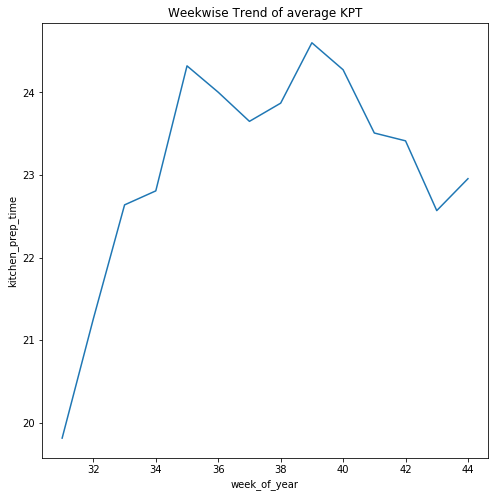

In [212]:
plt.figure(figsize=(8, 8))
plt.title('Weekwise Trend of average KPT')
sns.lineplot(x = week_grouping.index, y = 'kitchen_prep_time', data = week_grouping)
plt.show()

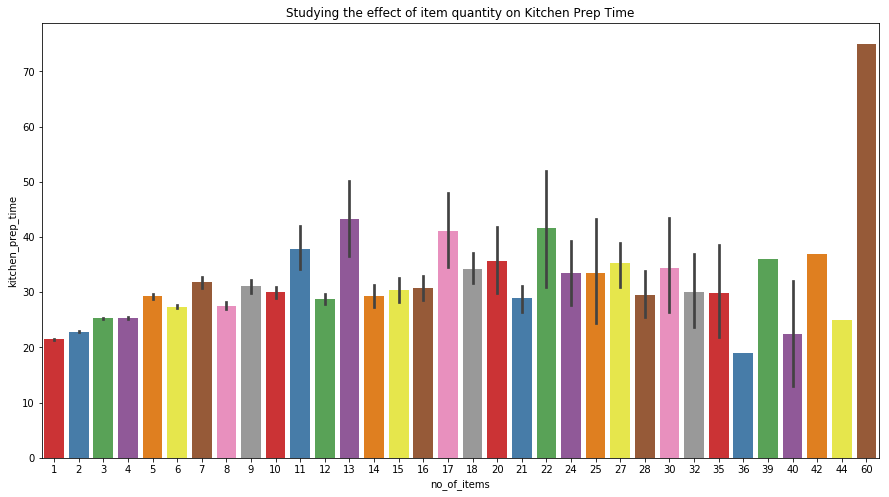

In [213]:
plt.figure(figsize=(15, 8))
plt.title('Studying the effect of item quantity on Kitchen Prep Time')
sns.barplot(x="no_of_items", y="kitchen_prep_time", data=df,palette='Set1')
plt.show()

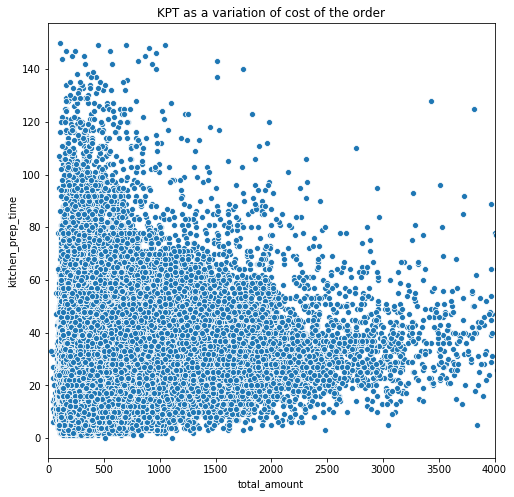

In [214]:
plt.figure(figsize=(8, 8))
plt.title('KPT as a variation of cost of the order')
sns.scatterplot(x='total_amount',y='kitchen_prep_time',data=df)
plt.xlim(0, 4000)
plt.show()

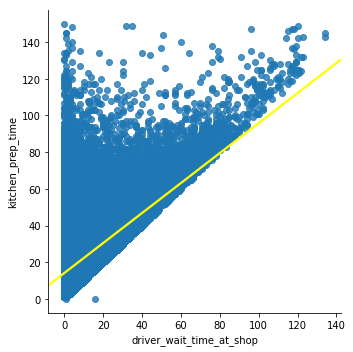

In [215]:
sns.lmplot(x='driver_wait_time_at_shop',y='kitchen_prep_time',data=df, line_kws={'color': 'yellow'})
plt.show()

### The Machine Learning Part

In [253]:
df.columns

Index(['id', 'pickup_user_id', 'total_amount', 'pickup_user_address_id',
       'created_at.y', 'driver_assigned_at', 'reached_shop_at', 'shipped_at',
       'reached_customer_at', 'complete_at', 'linked_at', 'no_of_items',
       'kitchen_prep_time', 'driver_wait_time_at_shop', 'first_mile_time',
       'hour_of_day', 'time_of_day', 'time_of_day_no', 'weekday_name',
       'weekday_no', 'weekend_or_not', 'week_of_year'],
      dtype='object')

In [254]:
# Choosing the appropriate features to train our model on
x_data = df[['total_amount','no_of_items', 'driver_wait_time_at_shop', 'first_mile_time',
       'hour_of_day', 'time_of_day_no',
       'weekday_no', 'weekend_or_not']]

In [255]:
y_target = df['kitchen_prep_time']

In [256]:
# Splitting the training and test sets 70 to 30
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.3, random_state=101)

In [257]:
# Creating the linear regression object
lm = LinearRegression()

In [258]:
# Fitting the model on our training data
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [259]:
# Coefficients obtained
coefficients = pd.Series(lm.coef_)
coefficients

0    0.000527
1    0.000103
2    0.933122
3    0.945717
4   -0.061208
5    0.415332
6    0.054839
7    0.002741
dtype: float64

In [260]:
factors = pd.Series(x_data.columns)

In [261]:
coef_df = pd.DataFrame([coefficients, factors]).transpose().set_index(factors).drop(1, axis = 1)
coef_df.columns = ['Coef']

In [262]:
coef_df

,Coef
total_amount,0.000526615
no_of_items,0.000102865
driver_wait_time_at_shop,0.933122
first_mile_time,0.945717
hour_of_day,-0.061208
time_of_day_no,0.415332
weekday_no,0.0548394
weekend_or_not,0.00274115


In [263]:
lm.intercept_

-10.072771019060653

In [264]:
our_predictions = lm.predict(x_test)

In [265]:
our_predictions

array([29.73975376, 29.50182386, 17.5946323 , ..., 23.38684972,
       45.52759728, 23.51323782])

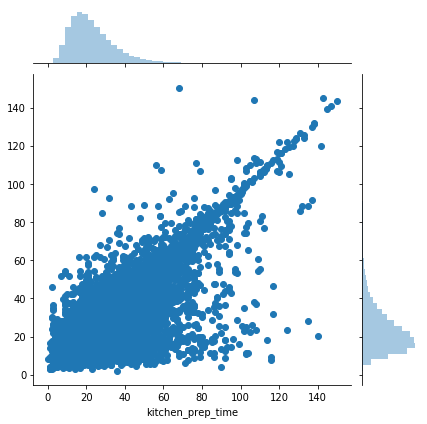

In [266]:
#Scatterplot between the actual KPT and our predicted KPT
sns.jointplot(y_test,our_predictions)
plt.show()

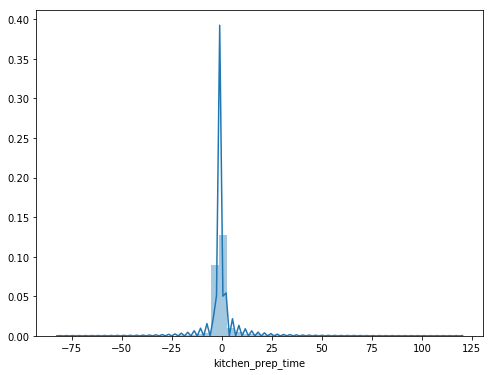

In [267]:
# Residual Histogram
plt.figure(figsize=(8, 6))
sns.distplot((y_test-our_predictions),bins=50);

In [268]:
# Metrics:
# Mean Absolute Error
mae_lr = metrics.mean_absolute_error(y_test, our_predictions)
mae_lr

2.6036601583184167

In [269]:
# Mean Squared Error
mse_lr = metrics.mean_squared_error(y_test, our_predictions)
mse_lr

35.57327868400455

In [270]:
# Root Mean Squared Error (Gives us the error in unit of KPT (minutes))
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, our_predictions))
rmse_lr

5.964333884349915

In [271]:
# R^2 Score
r2_lr = r2_score(y_test, our_predictions)
r2_lr

0.8069116605071167

In [272]:
# Similarly doing for Ridge Regression
ridge_obj = Ridge()
ridge_obj.fit(x_train, y_train)
coefficients = pd.Series(ridge_obj.coef_)
coef_df = pd.DataFrame([coefficients, factors]).transpose().set_index(factors).drop(1, axis = 1)
coef_df.columns = ['Coef']
coef_df

,Coef
total_amount,0.000526617
no_of_items,0.000102899
driver_wait_time_at_shop,0.933122
first_mile_time,0.945717
hour_of_day,-0.0611971
time_of_day_no,0.415292
weekday_no,0.0548392
weekend_or_not,0.00274199


In [273]:
ridge_obj.intercept_

-10.071670958424143

In [274]:
# Predicting for our test set data
our_ridge_predictions = ridge_obj.predict(x_test)

In [275]:
our_ridge_predictions

array([29.7397697 , 29.50182102, 17.59463847, ..., 23.38685457,
       45.52761172, 23.51323236])

In [276]:
#Calculating metrics
mae_ridge = metrics.mean_absolute_error(y_test, our_ridge_predictions)
print('Mean Abosulte Error: ' + str(mae_ridge))


mse_ridge = metrics.mean_squared_error(y_test, our_ridge_predictions)
print('Mean Squared Error: ' + str(mse_ridge))


rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test, our_ridge_predictions))
print('Root Mean Squared Error: ' + str(rmse_ridge))


r2_ridge = r2_score(y_test, our_ridge_predictions)
print('R^2 Score: ' + str(r2_ridge))

Mean Abosulte Error: 2.603660213516028
Mean Squared Error: 35.57327808374283
Root Mean Squared Error: 5.96433383402898
R^2 Score: 0.8069116637652797


In [277]:
# Lasso Regression

lasso_obj = Lasso(alpha = 0.005)
lasso_obj.fit(x_train, y_train)
our_lasso_predictions = lasso_obj.predict(x_test)
our_lasso_predictions

array([29.77726594, 29.49782783, 17.60989213, ..., 23.40008543,
       45.55529242, 23.49984218])

In [278]:
mae_lasso = metrics.mean_absolute_error(y_test, our_lasso_predictions)
print('Mean Abosulte Error: ' + str(mae_lasso))


mse_lasso = metrics.mean_squared_error(y_test, our_lasso_predictions)
print('Mean Squared Error: ' + str(mse_lasso))


rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, our_lasso_predictions))
print('Root Mean Squared Error: ' + str(rmse_lasso))


r2_lasso = r2_score(y_test, our_lasso_predictions)
print('R^2 Score: ' + str(r2_lasso))

Mean Abosulte Error: 2.603444281799385
Mean Squared Error: 35.572512934500146
Root Mean Squared Error: 5.964269689953678
R^2 Score: 0.806915816921868


In [279]:
forest_obj = RandomForestRegressor()
forest_obj.fit(x_train, y_train)
our_forest_predictions = forest_obj.predict(x_test)

In [280]:

mae_forest = metrics.mean_absolute_error(y_test, our_forest_predictions)
print('Mean Abosulte Error: ' + str(mae_forest))


mse_forest = metrics.mean_squared_error(y_test, our_forest_predictions)
print('Mean Squared Error: ' + str(mse_forest))


rmse_forest = np.sqrt(metrics.mean_squared_error(y_test, our_forest_predictions))
print('Root Mean Squared Error: ' + str(rmse_forest))


r2_forest = r2_score(y_test, our_forest_predictions)
print('R^2 Score: ' + str(r2_forest))

Mean Abosulte Error: 3.2609956264723317
Mean Squared Error: 43.176017134994595
Root Mean Squared Error: 6.5708459984232315
R^2 Score: 0.7656447265216236


In [281]:
results_df = pd.DataFrame({'Model Used': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest Regressor'],
              'Mean Absolute Error': [mae_lr, mae_ridge, mae_lasso, mae_forest],
              'Mean Squared Error': [mse_lr, mse_ridge, mse_lasso, mse_forest],
              'Root Mean Squared Error': [rmse_lr, rmse_ridge, rmse_lasso, rmse_forest],
              'R^2 Score': [r2_lr, r2_ridge, r2_lasso, r2_forest]
             })
results_df.set_index('Model Used', inplace = True)



### Summary

In [282]:
# Summary of the accuracy of ML models used
results_df

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R^2 Score
Model Used,,,,
Linear Regression,2.603660,35.573279,5.964334,0.806912
Ridge Regression,2.603660,35.573278,5.964334,0.806912
Lasso Regression,2.603444,35.572513,5.964270,0.806916
Random Forest Regressor,3.260996,43.176017,6.570846,0.765645


In the tests above, it is seen that Linear Regression and its regularisation variants (Lasso and Ridge) fared better
than Random Forest Regressor and the accuracy obtained is around 80% (as indicated by R^2 Score of 0.8) with an 
error of 5.9 minutes in Kitchen Prep Time Prediction (as indicated by Root Mean Squared Error).


******************************************************************************************************************